<a href="https://colab.research.google.com/github/seunga2590/Machine-Learning/blob/main/TimeDistributed_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
forecast = pd.read_excel('/content/drive/My Drive/lab/forecast/fore_last.xlsx')
forecast = forecast.set_index('일자')

In [ ]:
forecast.dtypes

발표시간     int64
서울      object
dtype: object

In [ ]:
forecast = forecast.replace('매우 좋음','0')
forecast = forecast.replace('좋음', '1')
forecast = forecast.replace('보통', '2')
forecast = forecast.replace('나쁨', '3')
forecast = forecast.replace('매우나쁨', '4')

In [ ]:
forecast.head()

,발표시간,서울
일자,,
2014-02-06,17,
2014-02-07,17,
2014-02-08,17,
2014-02-09,17,
2014-02-10,17,


In [ ]:
print(forecast['서울'].unique())

[' ' nan '2' '1' '3' '4']


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils

In [ ]:
forecast1 = forecast.dropna(how='any')

In [ ]:
le = LabelEncoder()
le.fit(forecast1['서울'])
encoded_Y = le.transform(forecast1['서울'])
onehot_labels = np_utils.to_categorical(encoded_Y)

In [ ]:
onehot_labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
one_fore = pd.get_dummies(forecast)
one_fore

,발표시간,서울_,서울_1,서울_2,서울_3,서울_4
일자,,,,,,
2014-02-06,17,1,0,0,0,0
2014-02-07,17,1,0,0,0,0
2014-02-08,17,1,0,0,0,0
2014-02-09,17,1,0,0,0,0
2014-02-10,17,1,0,0,0,0
...,...,...,...,...,...,...
2020-12-30,23,0,1,0,0,0
2020-12-31,5,0,1,0,0,0
2020-12-31,11,0,1,0,0,0


In [ ]:
train_ = one_fore[734:5118]
val_ = one_fore[5118:8038]
test_ = one_fore[8038:9258]

In [ ]:
train_.shape, val_.shape, test_.shape

((4384, 6), (2920, 6), (1220, 6))

In [ ]:
tra = pd.read_excel('/content/drive/My Drive/lab/tra/sum_5.xlsx')

In [ ]:
len(tra)

107021

In [ ]:
seo = tra['sta'] == '중구'
seo1 = tra[seo]
seo2 = seo1.drop(['요일','지점명','sta'], axis=1)
seo3 = seo2.groupby('일자').sum()
seo3

,0시,1시,2시,3시,4시,5시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
일자,,,,,,,,,,,,,,,,,,,,,,,
20150301,452.0,359.0,250.0,148.0,151.0,157.0,254.0,353.0,480.0,556.0,590.0,838.0,780.0,870.0,853.0,995.0,1008.0,862.0,696.0,589.0,592.0,478.0,407.0
20150302,364.0,210.0,160.0,135.0,166.0,304.0,980.0,1261.0,1029.0,1052.0,1162.0,1035.0,1336.0,1212.0,1174.0,1233.0,1225.0,1369.0,1182.0,904.0,882.0,801.0,618.0
20150303,557.0,381.0,281.0,199.0,186.0,265.0,928.0,1297.0,1171.0,1141.0,1198.0,1105.0,1240.0,1178.0,1228.0,1346.0,1315.0,1394.0,1111.0,952.0,820.0,726.0,610.0
20150304,522.0,369.0,261.0,195.0,179.0,287.0,957.0,1308.0,1170.0,1114.0,1216.0,1156.0,1279.0,1208.0,1252.0,1283.0,1292.0,1445.0,1282.0,923.0,911.0,783.0,644.0
20150305,556.0,422.0,314.0,225.0,188.0,278.0,879.0,1299.0,1132.0,1132.0,1282.0,1082.0,1247.0,1221.0,1284.0,1321.0,1192.0,1290.0,1151.0,982.0,924.0,782.0,649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201027,7458.0,5727.0,4272.0,3494.0,4046.0,6765.0,20669.0,23617.0,22293.0,20873.0,21090.0,19330.0,21483.0,21146.0,20952.0,20209.0,21092.0,19638.0,18058.0,15598.0,15979.0,13591.0,10595.0
20201028,7713.0,6245.0,4538.0,3520.0,4115.0,6963.0,20625.0,23016.0,21593.0,20085.0,21139.0,19525.0,20970.0,21084.0,20836.0,20539.0,20305.0,19338.0,17943.0,15751.0,15930.0,13506.0,10444.0
20201029,7740.0,5983.0,4636.0,3701.0,3898.0,6643.0,20578.0,23263.0,21951.0,20694.0,21077.0,20279.0,21214.0,20864.0,21130.0,20570.0,20781.0,19635.0,18130.0,16128.0,16507.0,13950.0,10878.0


In [ ]:
seo3.to_excel('/content/drive/My Drive/lab/tra/sum_seo.xlsx')

In [ ]:
gang = tra['sta'] == '강남구'
tra_g = tra[gang]
tra_g = tra_g.reset_index()

In [ ]:
tra_g = tra_g.groupby('일자').sum()

In [ ]:
tra_g

,index,0시,1시,2시,3시,4시,5시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
일자,,,,,,,,,,,,,,,,,,,,,,,,
20150601,692332,8739.0,5967.0,4408.0,3746.0,4633.0,9278.0,24959.0,26785.0,24892.0,23776.0,23793.0,21085.0,23625.0,23731.0,24400.0,23996.0,23944.0,24826.0,23186.0,20220.0,21733.0,21123.0,16405.0
20150602,692342,13714.0,10174.0,7855.0,6150.0,5612.0,8862.0,25299.0,25687.0,24696.0,22772.0,24033.0,21808.0,24018.0,23561.0,23793.0,23957.0,23973.0,24847.0,23192.0,20590.0,21887.0,21570.0,17036.0
20150603,692352,13091.0,10478.0,8046.0,6070.0,5273.0,8191.0,24930.0,26799.0,25333.0,24209.0,24686.0,21814.0,23294.0,22910.0,23633.0,24335.0,23770.0,24611.0,22432.0,21651.0,21673.0,21013.0,16852.0
20150604,577133,13264.0,10042.0,7732.0,5854.0,5367.0,8284.0,24667.0,26367.0,25436.0,24790.0,24167.0,21827.0,23480.0,23758.0,23893.0,24362.0,23825.0,24250.0,23259.0,21063.0,22527.0,21622.0,16878.0
20150605,577141,13795.0,10724.0,8157.0,6261.0,5466.0,8084.0,24165.0,26191.0,24590.0,24242.0,23923.0,22752.0,23204.0,23747.0,24934.0,24388.0,24362.0,23721.0,22851.0,19762.0,22600.0,22397.0,19191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201027,609117,16470.0,11956.0,9105.0,7579.0,8682.0,16058.0,39145.0,41005.0,38622.0,37074.0,36395.0,35664.0,37085.0,38289.0,38295.0,40027.0,39131.0,36457.0,34669.0,32763.0,32374.0,29657.0,23328.0
20201028,609145,17960.0,13068.0,9924.0,7710.0,8819.0,16050.0,38906.0,40987.0,38730.0,36090.0,36999.0,35347.0,37409.0,39073.0,38609.0,39872.0,39097.0,36374.0,35880.0,32685.0,33109.0,29677.0,23859.0
20201029,609173,17622.0,13935.0,10292.0,8201.0,9005.0,16642.0,38882.0,40728.0,37612.0,36381.0,36084.0,36012.0,36623.0,37845.0,38244.0,39546.0,38849.0,36636.0,35461.0,32822.0,33384.0,31040.0,24866.0


In [ ]:
date = tra_g.index
date = pd.DataFrame(date)

In [ ]:
date = date.append([date]*23, ignore_index=True)

In [ ]:
date = date.sort_values(by='일자')
date = date.reset_index()

In [ ]:
pd.DataFrame(date)

,index,일자
0,0,20150601
1,21870,20150601
2,17496,20150601
3,23328,20150601
4,16038,20150601
...,...,...
34987,27701,20201031
34988,29159,20201031
34989,30617,20201031
34990,16037,20201031


In [ ]:
tra_g = tra_g.drop('index', axis=1)

In [ ]:
tra_trans = tra_g.transpose()
tra_trans.head()

일자,20150601,20150602,20150603,20150604,20150605,20150607,20150608,20150609,20150610,20150611,20150612,20150613,20150614,20150615,20150616,20150617,20150618,20150619,20150620,20150621,20150622,20150623,20150624,20150625,20150626,20150627,20150628,20150629,20150630,20160101,20160102,20160103,20160104,20160105,20160106,20160107,20160108,20160109,20160110,20160111,...,20200922,20200923,20200924,20200925,20200926,20200927,20200928,20200929,20200930,20201001,20201002,20201003,20201004,20201005,20201006,20201007,20201008,20201009,20201010,20201011,20201012,20201013,20201014,20201015,20201016,20201017,20201018,20201019,20201020,20201021,20201022,20201023,20201024,20201025,20201026,20201027,20201028,20201029,20201030,20201031
0시,8739.0,13714.0,13091.0,13264.0,13795.0,9578.0,6219.0,10599.0,11239.0,11117.0,11314.0,13585.0,11924.0,6522.0,10963.0,11113.0,10633.0,12501.0,13774.0,9748.0,6577.0,11242.0,12008.0,11806.0,11073.0,14037.0,10545.0,8102.0,11179.0,25238.0,15446.0,19281.0,13703.0,21036.0,22114.0,22187.0,23106.0,10482.0,21081.0,14121.0,...,14191.0,15187.0,15207.0,16472.0,18582.0,14136.0,11288.0,18265.0,16487.0,8940.0,8729.0,11212.0,12463.0,9016.0,13918.0,15083.0,15634.0,18651.0,15135.0,12105.0,9671.0,14639.0,15369.0,17784.0,18886.0,21609.0,16859.0,11537.0,16411.0,17379.0,17851.0,18601.0,21771.0,17319.0,12174.0,16470.0,17960.0,17622.0,19057.0,22166.0
1시,5967.0,10174.0,10478.0,10042.0,10724.0,7308.0,4222.0,7647.0,8416.0,8419.0,8911.0,10424.0,9183.0,4447.0,8098.0,8350.0,8791.0,9824.0,11254.0,7329.0,4528.0,8171.0,8894.0,8995.0,8321.0,11536.0,8100.0,5708.0,8525.0,24514.0,12321.0,15025.0,10336.0,16036.0,17060.0,17543.0,18217.0,20216.0,16696.0,10524.0,...,9928.0,10931.0,11442.0,12380.0,14502.0,10310.0,7885.0,13231.0,12545.0,6120.0,6084.0,8300.0,9538.0,6033.0,10052.0,11054.0,11922.0,14461.0,8410.0,9087.0,7025.0,10633.0,11472.0,13401.0,14600.0,17576.0,12817.0,7931.0,11707.0,13211.0,13606.0,14581.0,17174.0,12992.0,8229.0,11956.0,13068.0,13935.0,14789.0,17754.0
2시,4408.0,7855.0,8046.0,7732.0,8157.0,5918.0,3022.0,5910.0,6277.0,6522.0,6538.0,9199.0,7415.0,3214.0,5968.0,6362.0,6727.0,7389.0,9413.0,5967.0,3289.0,6077.0,6646.0,6738.0,6705.0,9821.0,6367.0,4160.0,6398.0,18996.0,10028.0,12583.0,8299.0,12647.0,13283.0,13497.0,13992.0,17484.0,13685.0,8740.0,...,7417.0,8048.0,8359.0,9006.0,11917.0,8104.0,6029.0,10093.0,9604.0,4491.0,4336.0,6189.0,7326.0,4820.0,7376.0,8186.0,8589.0,12468.0,6689.0,7032.0,5421.0,8061.0,8389.0,9907.0,10749.0,14200.0,9908.0,6248.0,9094.0,9822.0,9880.0,10773.0,14456.0,10054.0,6447.0,9105.0,9924.0,10292.0,11314.0,14985.0
3시,3746.0,6150.0,6070.0,5854.0,6261.0,4461.0,2509.0,4450.0,4724.0,4830.0,4983.0,7358.0,5109.0,2609.0,4565.0,4867.0,4854.0,5716.0,7549.0,4841.0,2726.0,4674.0,4854.0,4933.0,5104.0,7500.0,5276.0,2589.0,4826.0,14781.0,8797.0,10812.0,7481.0,10455.0,10830.0,10878.0,11315.0,14739.0,11657.0,7875.0,...,6461.0,6469.0,6571.0,7076.0,9636.0,6488.0,5379.0,7540.0,8550.0,3767.0,3565.0,4691.0,5610.0,4442.0,6209.0,6764.0,6946.0,10472.0,5552.0,5702.0,5059.0,6485.0,6948.0,8097.0,8756.0,11445.0,7909.0,5881.0,7351.0,7914.0,7926.0,8707.0,11830.0,8098.0,5849.0,7579.0,7710.0,8201.0,8802.0,12340.0
4시,4633.0,5612.0,5273.0,5367.0,5466.0,4235.0,3124.0,4111.0,4329.0,4444.0,4616.0,6636.0,4605.0,3436.0,4353.0,4297.0,4304.0,4861.0,6570.0,4566.0,3327.0,4513.0,4438.0,4544.0,4366.0,6908.0,4826.0,3319.0,4405.0,12919.0,8815.0,9763.0,9318.0,10629.0,10762.0,10955.0,10917.0,12669.0,10478.0,9093.0,...,7747.0,7669.0,7737.0,7675.0,9386.0,6335.0,7739.0,8670.0,8581.0,3887.0,3573.0,4755.0,4982.0,6836.0,7396.0,7692.0,7935.0,9859.0,5932.0,5300.0,7323.0,7930.0,8001.0,9322.0,9500.0,11562.0,7830.0,8167.0,8962.0,9065.0,8863.0,9595.0,11558.0,7539.0,7955.0,8682.0,8819.0,9005.0,9568.0,11691.0


In [ ]:
# tra 하나의 열로 변경
df = []
def make_df(dataframe):
  dataframe = dataframe
  for i in range(len(dataframe.columns)):
    result = dataframe.iloc[:,i]
    df.append(result)
    re = pd.concat(df, ignore_index=True)
  return re

In [ ]:
df = make_df(tra_trans)

In [ ]:
df

0         8739.0
1         5967.0
2         4408.0
3         3746.0
4         4633.0
          ...   
33529    32743.0
33530    30760.0
33531    31154.0
33532    30476.0
33533    23838.0
Length: 33534, dtype: float64

In [ ]:
col_names = ['seoul', 'code','loc','date','SO2','CO','O3','NO2','PM10','PM25']

df = pd.read_excel('/content/drive/My Drive/Data/data_sum_1.xlsx', names = col_names)
df

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...,...,...
1025850,서울 노원구,111312,노원,2017123120,0.004,0.5,0.014,0.030,27.0,NaN
1025851,서울 노원구,111312,노원,2017123121,0.004,0.5,0.015,0.029,26.0,NaN
1025852,서울 노원구,111312,노원,2017123122,0.005,0.5,0.014,0.027,35.0,NaN
1025853,서울 노원구,111312,노원,2017123123,0.005,0.4,0.017,0.024,36.0,NaN


In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/Data/data_sum_2.xlsx', names = col_names)
df1

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0
1,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0
2,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0
3,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0
4,서울 중구,111121,중구,2018010106,0.004,0.5,0.012,0.027,29.0,17.0
...,...,...,...,...,...,...,...,...,...,...
986298,서울 노원구,111312,노원,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,서울 노원구,111312,노원,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,서울 노원구,111312,노원,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,서울 노원구,111312,노원,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [ ]:
df_sum = pd.concat([df, df1])
df_sum

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...,...,...
986298,서울 노원구,111312,노원,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,서울 노원구,111312,노원,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,서울 노원구,111312,노원,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,서울 노원구,111312,노원,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [ ]:
gang = df_sum['loc'] == '강남'
df_gang = df_sum[gang]
df_gang

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
58319,서울,111261,강남,2015010101,0.006,0.2,0.026,0.011,42.0,24.0
58320,서울,111261,강남,2015010102,0.005,0.2,0.025,0.010,54.0,12.0
58321,서울,111261,강남,2015010103,0.005,0.2,0.024,0.010,73.0,19.0
58322,서울,111261,강남,2015010104,0.007,0.2,0.025,0.008,89.0,18.0
58323,서울,111261,강남,2015010105,0.006,0.2,0.025,0.008,106.0,23.0
...,...,...,...,...,...,...,...,...,...,...
978858,서울 강남구,111263,강남,2020103120,0.004,1.0,0.018,0.039,27.0,10.0
978859,서울 강남구,111263,강남,2020103121,0.004,1.0,0.020,0.032,28.0,11.0
978860,서울 강남구,111263,강남,2020103122,0.004,1.0,0.020,0.032,31.0,13.0
978861,서울 강남구,111263,강남,2020103123,0.004,1.0,0.016,0.036,37.0,13.0


In [ ]:
df_gang1 = df_gang.drop(['seoul','code','loc'], axis=1)
df_gang1

,date,SO2,CO,O3,NO2,PM10,PM25
58319,2015010101,0.006,0.2,0.026,0.011,42.0,24.0
58320,2015010102,0.005,0.2,0.025,0.010,54.0,12.0
58321,2015010103,0.005,0.2,0.024,0.010,73.0,19.0
58322,2015010104,0.007,0.2,0.025,0.008,89.0,18.0
58323,2015010105,0.006,0.2,0.025,0.008,106.0,23.0
...,...,...,...,...,...,...,...
978858,2020103120,0.004,1.0,0.018,0.039,27.0,10.0
978859,2020103121,0.004,1.0,0.020,0.032,28.0,11.0
978860,2020103122,0.004,1.0,0.020,0.032,31.0,13.0
978861,2020103123,0.004,1.0,0.016,0.036,37.0,13.0


In [ ]:
df_gang2 = df_gang1.groupby('date').mean()
df_gang3 = df_gang2.reset_index()
df_gang3

,date,SO2,CO,O3,NO2,PM10,PM25
0,2015010101,0.0060,0.45,0.0185,0.0115,40.5,24.0
1,2015010102,0.0055,0.45,0.0180,0.0105,56.5,12.0
2,2015010103,0.0055,0.45,0.0180,0.0085,74.0,19.0
3,2015010104,0.0065,0.45,0.0185,0.0065,89.5,18.0
4,2015010105,0.0060,0.50,0.0185,0.0070,105.5,23.0
...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.75,0.0240,0.0315,24.5,12.0
51140,2020103121,0.0040,0.70,0.0240,0.0275,25.5,13.0
51141,2020103122,0.0040,0.75,0.0225,0.0285,27.0,14.5
51142,2020103123,0.0035,0.70,0.0225,0.0290,30.5,13.5


In [ ]:
atm = pd.read_excel('/content/drive/My Drive/lab/jung_sum_2.xlsx', index_col=0)
atm

,date,tem,rain,wind_s,wind_d,hum,pre,wind_x,wind_y
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8,2.643416,-3.886174
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7,2.530930,-3.720805
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1,2.137230,-3.142013
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3,2.755902,-4.051544
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...
51139,2020103120,15.1,NaN,2.8,200.0,59.0,10.1,1.364125,2.445232
51140,2020103121,14.9,NaN,2.7,200.0,58.0,9.7,1.315407,2.357903
51141,2020103122,14.9,NaN,2.6,200.0,57.0,9.6,1.266688,2.270573
51142,2020103123,14.9,NaN,2.0,200.0,54.0,9.1,0.974375,1.746595


In [ ]:
col_names2 = ['date','tem','rain','wind_s','wind_d','hum','pre']
df_atm = pd.read_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",names = col_names2)
df_atm

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020-12-31 19:00:00,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2.3


In [ ]:
df_gang3['tem'] = atm['tem']
df_gang3['rain'] = atm['rain']
df_gang3['hum'] = atm['hum']
df_gang3['pre'] = atm['pre']
df_gang3['wind_x'] = atm['wind_x']
df_gang3['wind_y'] = atm['wind_y']
df_gang3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015010101,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,NaN,33.0,1011.8,2.643416,-3.886174
1,2015010102,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,NaN,35.0,1011.7,2.530930,-3.720805
2,2015010103,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,NaN,37.0,1012.1,2.137230,-3.142013
3,2015010104,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,NaN,35.0,1012.3,2.755902,-4.051544
4,2015010105,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,NaN,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,NaN,59.0,10.1,1.364125,2.445232
51140,2020103121,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,NaN,58.0,9.7,1.315407,2.357903
51141,2020103122,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,NaN,57.0,9.6,1.266688,2.270573
51142,2020103123,0.0035,0.70,0.0225,0.0290,30.5,13.5,14.9,NaN,54.0,9.1,0.974375,1.746595


In [ ]:
df_gang3['date'] = df_atm['date']

In [ ]:
df_gang3['rain'] = df_gang3['rain'].fillna(0)

In [ ]:
df_final = df_gang3.copy()

In [ ]:
pm10 = df_final['PM10']<400.0
df_fin = df_final.copy()

In [ ]:
a = df_final['PM10']>400
a1 = df_final[a]
df_final[a]

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
1266,2015-02-22 19:00:00,0.0045,0.30,0.0185,0.0220,522.5,54.0,0.9,0.0,64.0,1007.8,4.035966,0.721788
1267,2015-02-22 20:00:00,0.0040,0.30,0.0175,0.0220,617.5,47.0,0.5,0.0,64.0,1008.3,4.725033,0.845021
1268,2015-02-22 21:00:00,0.0040,0.30,0.0160,0.0235,754.0,64.0,0.2,0.0,66.0,1009.1,2.854708,0.510533
1269,2015-02-22 22:00:00,0.0045,0.30,0.0160,0.0235,841.5,68.0,-0.1,0.0,65.0,1009.4,4.528157,0.809811
1270,2015-02-22 23:00:00,0.0040,0.25,0.0185,0.0195,890.5,82.0,-0.3,0.0,67.0,1010.0,4.035966,0.721788
1271,2015-02-23 00:00:00,0.0040,0.30,0.0190,0.0170,903.5,87.0,-0.7,0.0,68.0,1010.2,3.642213,0.651370
1272,2015-02-23 01:00:00,0.0040,0.30,0.0200,0.0140,884.5,84.0,-1.0,0.0,66.0,1010.3,3.839090,0.686579
1273,2015-02-23 02:00:00,0.0045,0.35,0.0215,0.0110,866.0,86.0,-1.2,0.0,67.0,1010.3,3.642213,0.651370
1274,2015-02-23 03:00:00,0.0040,0.30,0.0225,0.0095,890.0,83.0,-1.5,0.0,69.0,1009.8,0.843643,-1.240268
1275,2015-02-23 04:00:00,0.0035,0.35,0.0215,0.0105,907.0,78.0,-1.9,0.0,67.0,1009.6,2.067202,0.369696


In [ ]:
df_fin1 = df_final.drop(a1.index, axis=0)
df_fin1

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0035,0.70,0.0225,0.0290,30.5,13.5,14.9,0.0,54.0,9.1,0.974375,1.746595


In [ ]:
df_fin2 = df_fin1.set_index('date')
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
from datetime import datetime

date = pd.to_datetime(df_fin2.index, format='%Y-%m-%d, %H:%M:%S')
date

DatetimeIndex(['2015-01-01 01:00:00', '2015-01-01 02:00:00',
               '2015-01-01 03:00:00', '2015-01-01 04:00:00',
               '2015-01-01 05:00:00', '2015-01-01 06:00:00',
               '2015-01-01 07:00:00', '2015-01-01 08:00:00',
               '2015-01-01 09:00:00', '2015-01-01 10:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=51119, freq=None)

In [ ]:
df_fin2['date'] = date

In [ ]:
df_2015 = df_fin2[:8740]
df_2015

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 20:00:00,0.0070,1.00,0.0030,0.0625,95.5,64.0,-0.1,0.0,81.0,1022.0,0.771973,0.209900,2015-12-31 20:00:00
2015-12-31 21:00:00,0.0070,0.95,0.0025,0.0610,100.5,78.0,-0.7,0.0,84.0,1022.4,1.157959,0.314850,2015-12-31 21:00:00
2015-12-31 22:00:00,0.0070,1.05,0.0020,0.0645,106.0,69.0,-1.3,0.0,83.0,1022.4,1.061463,0.288612,2015-12-31 22:00:00


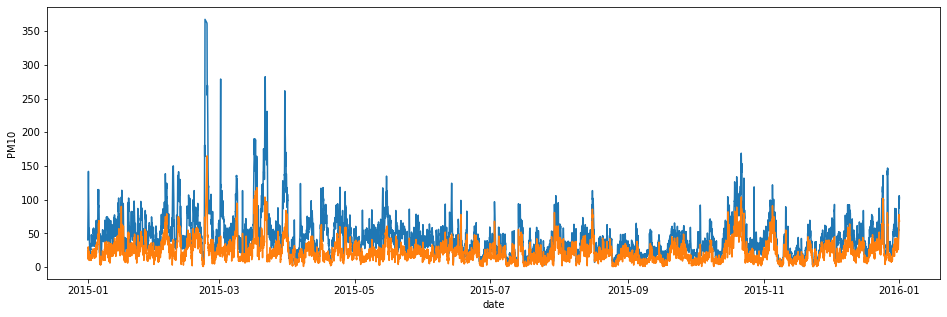

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
sns.lineplot(y=df_2015['PM10'], x=df_2015['date'])
sns.lineplot(y=df_2015['PM25'], x=df_2015['date'])
plt.xlabel('date')
plt.ylabel('PM10')
plt.show()

In [ ]:
df_fin3 = df_fin2.interpolate(method='values')
df_fin3

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,2020-10-31 22:00:00


In [ ]:
df_fin4 = df_fin3.dropna(how='any')
df_fin4

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,2020-10-31 22:00:00


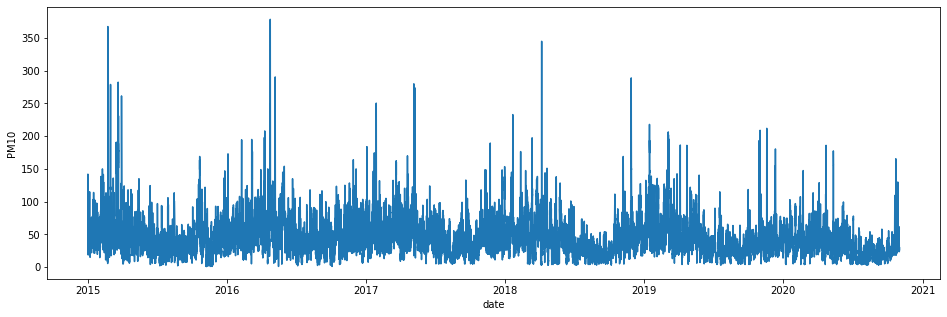

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(y=df_fin4['PM10'], x=df_fin4['date'])
plt.xlabel('date')
plt.ylabel('PM10')
plt.show()

In [ ]:
df_new = df_fin4.copy()
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,2020-10-31 22:00:00


In [ ]:
new = df_fin2.drop('date', axis=1)
new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
new1 = new.interpolate(method='values')
new1

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
new2 = new1.dropna(how='any')
new2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
new3 = new2.reset_index()

In [ ]:
pm = new3['PM10']
pm1 = pm[24:]
pm10 = pm1.reset_index()

In [ ]:
new3['pm10_tomm'] = pm10['PM10']
new3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,21.0
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,23.0
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,25.5
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,18.5
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51114,2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,NaN
51115,2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,NaN
51116,2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,NaN
51117,2020-10-31 23:00:00,0.0035,0.70,0.0225,0.0290,30.5,13.5,14.9,0.0,54.0,9.1,0.974375,1.746595,NaN


In [ ]:
prac = new3.copy()

In [ ]:
pd.to_datetime(prac['date'])

0       2015-01-01 01:00:00
1       2015-01-01 02:00:00
2       2015-01-01 03:00:00
3       2015-01-01 04:00:00
4       2015-01-01 05:00:00
                ...        
51114   2020-10-31 20:00:00
51115   2020-10-31 21:00:00
51116   2020-10-31 22:00:00
51117   2020-10-31 23:00:00
51118   2020-11-01 00:00:00
Name: date, Length: 51119, dtype: datetime64[ns]

In [ ]:
prac['dayofweek'] = prac['date'].dt.dayofweek

In [ ]:
prac.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm,dayofweek
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,21.0,3
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,23.0,3
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,25.5,3
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,18.5,3
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,22.5,3


In [ ]:
hour = prac['date'].astype(str).str[11:13]
prac['hour'] = hour

In [ ]:
mon = prac['dayofweek'] == 0
monday = prac[mon]
monday.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm,dayofweek,hour
95,2015-01-05 00:00:00,0.0055,1.05,0.0025,0.0540,58.0,28.0,0.3,0.0,89.0,1008.9,2.605408,0.708412,92.0,0,00
96,2015-01-05 01:00:00,0.0045,1.00,0.0020,0.0500,56.5,27.0,-0.3,0.0,92.0,1009.0,2.315918,0.629700,89.5,0,01
97,2015-01-05 02:00:00,0.0055,1.00,0.0025,0.0465,52.0,37.0,-0.5,0.0,95.0,1010.0,0.693740,-1.552007,91.5,0,02
98,2015-01-05 03:00:00,0.0050,1.05,0.0020,0.0445,48.5,36.0,-0.7,0.0,95.0,1010.5,2.219422,0.603462,71.0,0,03
99,2015-01-05 04:00:00,0.0050,0.85,0.0020,0.0360,48.5,31.0,-0.9,0.0,95.0,1010.7,1.061013,-2.373658,58.5,0,04


In [ ]:
monday = monday.groupby('hour').mean()

In [ ]:
tue = prac['dayofweek'] == 1
tuesday = prac[tue]
wed = prac['dayofweek'] == 2
wednesday = prac[wed]
thu = prac['dayofweek'] == 3
thursday = prac[thu]
fri = prac['dayofweek'] == 4
friday = prac[fri]
sat = prac['dayofweek'] == 5
saturday = prac[sat]
sun = prac['dayofweek'] == 6
sunday = prac[sun]

In [ ]:
tuesday = tuesday.groupby('hour').mean()

In [ ]:
wednesday = wednesday.groupby('hour').mean()
thursday = thursday.groupby('hour').mean()
friday = friday.groupby('hour').mean()
saturday = saturday.groupby('hour').mean()
sunday = sunday.groupby('hour').mean()

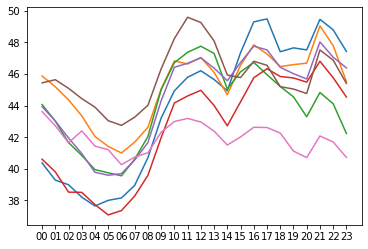

In [ ]:
plt.plot(monday['PM10'])
plt.plot(tuesday['PM10'])
plt.plot(wednesday['PM10'])
plt.plot(thursday['PM10'])
plt.plot(friday['PM10'])
plt.plot(saturday['PM10'])
plt.plot(sunday['PM10'])
plt.show()

In [ ]:
new4 = new3.dropna(how='any')

In [ ]:
grade = []
for each in new4['PM10']:
  if each <=30:
    grade.append(0)
  elif each <=80:
    grade.append(1)
  elif each <=150:
    grade.append(2)
  else:
    grade.append(3)

In [ ]:
grade_pm_tomm = grade[1:]
grade_pm_tomm.append(np.nan)
new4['grade_pm_tomm'] = grade_pm_tomm
new5 = new4.dropna(how='any')
new6 = new5.set_index('date')
new7 = new6.drop('pm10_tomm', axis=1)
new7.to_excel('/content/drive/My Drive/Data/final_data.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pm = new7['PM10']
pm1 = pm[1:]
pm10 = pm1.reset_index()
pm10

,date,PM10
0,2015-01-01 02:00:00,56.5
1,2015-01-01 03:00:00,74.0
2,2015-01-01 04:00:00,89.5
3,2015-01-01 05:00:00,105.5
4,2015-01-01 06:00:00,127.0
...,...,...
51088,2020-10-30 19:00:00,35.5
51089,2020-10-30 20:00:00,50.5
51090,2020-10-30 21:00:00,61.0
51091,2020-10-30 22:00:00,60.5


In [ ]:
new_pm = new7.reset_index()
new_pm['value_pm_tomm'] = pm10['PM10']

In [ ]:
new_pm.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm,value_pm_tomm
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,1.0,56.5
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,1.0,74.0
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2.0,89.5
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2.0,105.5
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2.0,127.0


In [ ]:
cnn_data = new_pm.copy()

In [ ]:
bad = cnn_data['PM10'] > 80
bad_data = cnn_data[bad]

In [ ]:
X = new7[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
y = new7['grade_pm_tomm']

In [ ]:
x_train = X[:26283]
x_val = X[26283:43803]
x_test = X[43803:]
y_train = y[:26283]
y_val = y[26283:43803]
y_test = y[43803:]

In [ ]:
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)

In [ ]:
batch_size= 5

In [ ]:
N = BUFFER_SIZE = len(y_train_np)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()
train_dataset

<RepeatDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

In [ ]:
new_pm.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm,value_pm_tomm
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,1.0,56.5
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,1.0,74.0
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2.0,89.5
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2.0,105.5
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2.0,127.0


In [ ]:
pm = new_pm['PM10'][1:]
pm1 = pm.reset_index()

In [ ]:
new_pm1 = new_pm.drop(['grade_pm_tomm'], axis=1)
new_pm1 = new_pm1.dropna(how='any')
new_pm2 = new_pm1.drop('value_pm_tomm', axis=1)
new_pm2.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020


In [ ]:
lstm_train = pd.read_excel('/content/drive/My Drive/Data/lstm-train.xlsx')
lstm_val = pd.read_excel('/content/drive/My Drive/Data/lstm-val.xlsx')
lstm_test = pd.read_excel('/content/drive/My Drive/Data/lstm-test.xlsx')

In [ ]:
lstm_train.shape, lstm_val.shape, lstm_test.shape

((26187, 2), (17424, 2), (7194, 2))

In [ ]:
new_pm2

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51088,2020-10-30 18:00:00,0.0045,0.75,0.0180,0.0320,28.0,12.0,15.3,0.0,35.0,6.1,0.787400,-1.157584
51089,2020-10-30 19:00:00,0.0045,0.95,0.0050,0.0530,35.5,17.5,13.8,0.0,37.0,5.8,1.279697,0.228860
51090,2020-10-30 20:00:00,0.0045,1.20,0.0020,0.0610,50.5,26.0,12.7,0.0,39.0,5.7,0.925657,1.659265
51091,2020-10-30 21:00:00,0.0050,1.50,0.0020,0.0630,61.0,34.5,11.8,0.0,45.0,6.2,0.531768,-0.455218


In [ ]:
train = new_pm2[:26283]
val = new_pm2[26283:43803]
test = new_pm2[43803:]

In [ ]:
train = train.set_index('date')
val = val.set_index('date')
test = test.set_index('date')

In [ ]:
#mean = train.mean()
#std = train.std()

#train_scaled = (train - mean) / std
#val_scaled = (val-mean) / std
#test_scaled = (test-mean) / std

#train_scaled = train_scaled.reset_index()
#val_scaled = val_scaled.reset_index()
#test_scaled = test_scaled.reset_index()

In [ ]:
scaler = StandardScaler() 

scaler.fit(train) # 메소드 적용

train_scaled = pd.DataFrame(scaler.transform(train))
valid_scaled = pd.DataFrame(scaler.transform(val))
test_scaled = pd.DataFrame(scaler.transform(test))

In [ ]:
train_scaled.shape, valid_scaled.shape, test_scaled.shape

((26283, 12), (17520, 12), (7290, 12))

In [ ]:
train = train.reset_index()
val = val.reset_index()
test = test.reset_index()

In [ ]:
train = new_pm2[:26283]
val = new_pm2[26283:43803]
test = new_pm2[43803:]

In [ ]:
val = val.reset_index()
test = test.reset_index()

In [ ]:
train_scaled['predict'] = train['PM10']
valid_scaled['predict'] = val['PM10']
test_scaled['predict'] = test['PM10']

In [ ]:
train_scaled['date'] = train['date']
valid_scaled['date'] = val['date']
test_scaled['date'] = test['date']

In [ ]:
train_scaled = train_scaled.set_index('date')
valid_scaled = valid_scaled.set_index('date')
test_scaled = test_scaled.set_index('date')

In [ ]:
train_scaled.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'predict'], dtype='object')

In [ ]:
train_scaled.columns = ['SO2',	'CO',	'O3',	'NO2'	,'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre'	,'wind_x'	,'wind_y','predict']
valid_scaled.columns = ['SO2',	'CO',	'O3',	'NO2'	,'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre'	,'wind_x'	,'wind_y','predict']
test_scaled.columns = ['SO2',	'CO',	'O3',	'NO2'	,'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre'	,'wind_x'	,'wind_y','predict']

In [ ]:
train_scaled.head()

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,predict
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.666770,-0.666283,-0.067567,-1.612953,-0.266890,-0.068116,-1.868094,-0.105218,-1.307867,1.428957,0.911589,-2.062732,40.5
2015-01-01 02:00:00,0.304622,-0.666283,-0.099283,-1.675078,0.286816,-0.791937,-1.921908,-0.105218,-1.206859,1.428744,0.845016,-1.972199,56.5
2015-01-01 03:00:00,0.304622,-0.666283,-0.099283,-1.799327,0.892433,-0.369708,-1.957784,-0.105218,-1.105850,1.429597,0.612010,-1.655333,74.0
2015-01-01 04:00:00,1.028919,-0.666283,-0.067567,-1.923577,1.428836,-0.430026,-1.993660,-0.105218,-1.206859,1.430024,0.978162,-2.153266,89.5
2015-01-01 05:00:00,0.666770,-0.443656,-0.067567,-1.892514,1.982543,-0.128434,-2.020567,-0.105218,-1.206859,1.428957,1.244454,-2.515398,105.5


In [ ]:
new_train = train_scaled[['SO2',	'CO',	'O3',	'NO2'	,'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre'	,'wind_x'	,'wind_y']]
new_valid = valid_scaled[['SO2',	'CO',	'O3',	'NO2'	,'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre'	,'wind_x'	,'wind_y']]
new_test = test_scaled[['SO2',	'CO',	'O3',	'NO2'	,'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre'	,'wind_x'	,'wind_y']]

In [ ]:
#train_set = train_set.drop('index', axis=1)
#val_set = val_set.drop('index', axis=1)
#test_set = test_set.drop('index', axis=1)

In [ ]:
#train_set['lstm'] = lstm_train[0]
#val_set['lstm'] = lstm_val[0]
#test_set['lstm'] = lstm_test[0]

In [ ]:
train_scaled = train_scaled.dropna(how='any')
valid_scaled = valid_scaled.dropna(how='any')
test_scaled = test_scaled.dropna(how='any')

In [ ]:
train_x = train_scaled[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
train_y = train_scaled['predict']
valid_x = valid_scaled[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
valid_y = valid_scaled['predict']
test_x = test_scaled[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
test_y = test_scaled['predict']

In [ ]:
#train_x = train_x.reset_index()
#valid_x = valid_x.reset_index()
#test_x = test_x.reset_index()

In [ ]:
train_set = train_x.values
valid_set = valid_x.values
test_set = test_x.values

train_y = train_y.values
valid_y = valid_y.values
test_y = test_y.values

In [ ]:
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape

((26283, 12), (26283,), (17520, 12), (17520,), (7290, 12), (7290,))

In [ ]:
from numpy import array

def split_sequence(sequence, target,  n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], target[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
def to_sequences(SEQUENCE_SIZE, data1 ,data2):
    x = []
    y = []

    for i in range(len(data1)-SEQUENCE_SIZE-1):
        window = data1[i:(i+SEQUENCE_SIZE)]
        after_window = data2[i+SEQUENCE_SIZE]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
t_x, t_y = to_sequences(24, train_set, train_y)

In [ ]:
v_x, v_y = to_sequences(24, valid_set, valid_y)
ts_x, ts_y = to_sequences(24, test_set, test_y)

In [ ]:
t_x.shape, t_y.shape, v_x.shape, v_y.shape, ts_x.shape, ts_y.shape

((26258, 24, 12), (26258,), (17495, 24, 12), (17495,), (7265, 24, 12), (7265,))

In [ ]:
X_train = []
y_train = []

n_past = 24
n_future = 24

for i in range(n_past, len(train_set) - n_future):
    X_train.append(train_set[i - n_past:i,
                   0:train_set.shape[1]])
    y_train.append(train_y[i+n_future-1:i+n_future])
X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_valid = []
y_valid = []
for i in range(n_past, len(valid_set) - n_future +1):
    X_valid.append(valid_set[i - n_past:i,
                   0:valid_x.shape[1]])
    y_valid.append(valid_set[i+n_future-1:i+n_future, 4])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [ ]:
X_test = []
y_test = []

for i in range(n_past, len(test_set) - n_future +1):
    X_test.append(test_set[i - n_past:i,
                   0:test_set.shape[1]])
    y_test.append(test_y[i+n_future-1:i+n_future])
X_test,y_test = np.array(X_test), np.array(y_test)

In [ ]:
y_train.shape, y_valid.shape, y_test.shape

((26235, 1), (17473, 1), (7243, 1))

In [ ]:
print('X_train shape {}.'.format(X_train.shape))
print('y_train shape {}.'.format(y_train.shape))

X_train shape (26235, 24, 12).
y_train shape (26235, 1).


In [ ]:
time_train_x = X_train.reshape(X_train.shape[0], 1, 24, 12)
time_valid_x = X_valid.reshape(X_valid.shape[0], 1, 24, 12)
time_test_x = X_test.reshape(X_test.shape[0],1,24,12)

In [ ]:
time_t_x = t_x.reshape(t_x.shape[0], 1, 24,12)
time_v_x = v_x.reshape(v_x.shape[0], 1, 24, 12)
time_ts_x = ts_x.reshape(ts_x.shape[0], 1, 24, 12)

In [ ]:
time_t_x.shape, time_v_x.shape, time_ts_x.shape

((26258, 1, 24, 12), (17495, 1, 24, 12), (7265, 1, 24, 12))

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Conv1D, Conv2D
from keras.layers import MaxPooling1D, MaxPooling2D
from keras.layers import Dropout
from tensorflow.keras import initializers
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU

initializer = tf.keras.initializers.he_uniform()

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32,
                                 kernel_size=24,
                                 strides=1,
                                 activation='relu',
                                 padding='same',input_shape=(24, 12))))
model.add(TimeDistributed(MaxPooling1D(pool_size=2, strides=1, padding="valid")))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(1))
adam = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer= adam, loss='mse', metrics=['mae'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn-lstm.h5', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = model.fit(time_train_x, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(time_valid_x, y_valid),
                    callbacks=[checkpoint_cb, early_stop])

Epoch 1/100
820/820 [==============================] - 16s 11ms/step - loss: 867.0970 - mae: 20.3753 - val_loss: 2411.6692 - val_mae: 47.2000
Epoch 2/100
820/820 [==============================] - 8s 10ms/step - loss: 683.5384 - mae: 17.9487 - val_loss: 2600.8589 - val_mae: 48.7825
Epoch 3/100
820/820 [==============================] - 8s 10ms/step - loss: 630.0846 - mae: 17.4122 - val_loss: 2405.3586 - val_mae: 46.2458
Epoch 4/100
820/820 [==============================] - 8s 9ms/step - loss: 590.0339 - mae: 17.0385 - val_loss: 2451.3555 - val_mae: 47.0375
Epoch 5/100
820/820 [==============================] - 8s 10ms/step - loss: 543.4433 - mae: 16.6701 - val_loss: 1913.4626 - val_mae: 40.8968
Epoch 6/100
820/820 [==============================] - 8s 10ms/step - loss: 471.4673 - mae: 15.7138 - val_loss: 3244.8806 - val_mae: 53.7351
Epoch 7/100
820/820 [==============================] - 8s 10ms/step - loss: 416.2579 - mae: 15.1275 - val_loss: 2680.5481 - val_mae: 48.1628
Epoch 8/100
8

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_36 (TimeDis (None, 1, 24, 32)         9248      
_________________________________________________________________
time_distributed_37 (TimeDis (None, 1, 23, 32)         0         
_________________________________________________________________
time_distributed_38 (TimeDis (None, 1, 736)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 1, 64)             205056    
_________________________________________________________________
lstm_47 (LSTM)               (None, 32)                12416     
_________________________________________________________________
flatten_33 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 32)              

In [ ]:
pred = model.predict(time_test_x)
print('Loss', model.evaluate(time_test_x, y_test))

227/227 [==============================] - 1s 3ms/step - loss: 675.7060 - mae: 18.8074
Loss [675.7059936523438, 18.807411193847656]


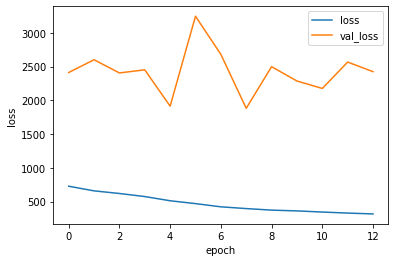

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show() 

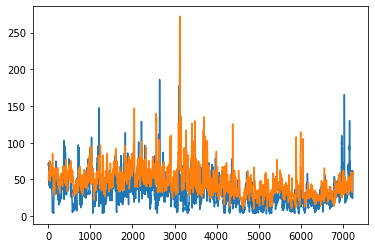

In [ ]:
plt.plot(y_test)
plt.plot(model.predict(time_test_x))

####Simple CNN-LSTM

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Conv1D, Conv2D
from keras.layers import MaxPooling1D, MaxPooling2D
from keras.layers import Dropout

model = Sequential()
model.add(Conv1D(filters=32,
                 kernel_size=24,
                 strides=1,
                 activation='relu',
                 padding='same',input_shape=(24, 12)))
model.add(MaxPooling1D(pool_size=2, strides=1, padding="valid"))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.02))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(1))

model.compile(optimizer= adam, loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 24, 32)            9248      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 23, 32)            0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 23, 64)            24832     
_________________________________________________________________
lstm_49 (LSTM)               (None, 32)                12416     
_________________________________________________________________
flatten_34 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)              

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn-lstm.h5')
early_stop = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stop])

Epoch 1/100
820/820 [==============================] - 30s 30ms/step - loss: 2221.6375 - mae: 26.3685 - val_loss: 2126.2310 - val_mae: 44.2632
Epoch 2/100
820/820 [==============================] - 24s 29ms/step - loss: 691.3175 - mae: 17.9172 - val_loss: 2460.0710 - val_mae: 47.5128
Epoch 3/100
820/820 [==============================] - 24s 29ms/step - loss: 639.6406 - mae: 17.5165 - val_loss: 2324.2881 - val_mae: 46.3054
Epoch 4/100
820/820 [==============================] - 24s 29ms/step - loss: 634.7352 - mae: 17.4943 - val_loss: 2155.2458 - val_mae: 45.0067
Epoch 5/100
820/820 [==============================] - 24s 29ms/step - loss: 658.8053 - mae: 17.6764 - val_loss: 2053.2361 - val_mae: 43.1894
Epoch 6/100
820/820 [==============================] - 24s 29ms/step - loss: 622.6214 - mae: 17.2525 - val_loss: 2726.2703 - val_mae: 50.2477
Epoch 7/100
820/820 [==============================] - 24s 29ms/step - loss: 607.2553 - mae: 17.0512 - val_loss: 2180.6140 - val_mae: 44.5871
Epoch

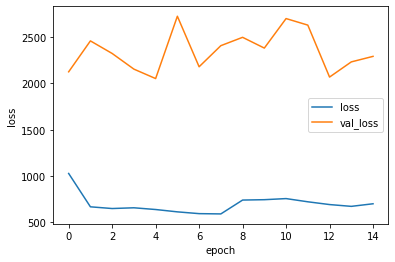

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show() 

In [ ]:
model.save_weights('weights/magazine_model_weights.ckpt')

In [ ]:
model.load_weights('weights/magazine_model_weights.ckpt')

In [ ]:
pred = model.predict(X_test)
print('Loss', model.evaluate(X_test, y_test))

227/227 [==============================] - 2s 8ms/step - loss: 465.3242 - mae: 16.9731
Loss [465.32421875, 16.973052978515625]


In [ ]:
model.predict(X_test)

array([[50.31681],
       [49.7881 ],
       [50.95155],
       ...,
       [53.89918],
       [42.78039],
       [40.07831]], dtype=float32)

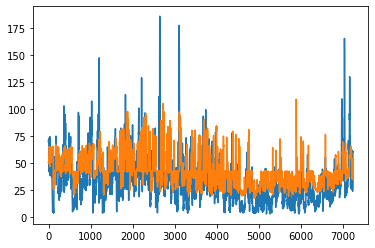

In [ ]:
plt.plot(y_test)
plt.plot(model.predict(X_test))

###LSTM

In [ ]:
t_x.shape, t_y.shape, v_x.shape, v_y.shape, ts_x.shape, ts_y.shape

((26258, 24, 12), (26258,), (17495, 24, 12), (17495,), (7265, 24, 12), (7265,))

In [ ]:
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

model = tf.keras.models.Sequential()
model.add(LSTM(64,
               input_shape=(X_train[1], y_train[2]),
               activation='tanh',
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn-lstm.h5', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

Epoch 1/100
820/820 [==============================] - 25s 26ms/step - loss: 749.0546 - mae: 18.9968 - val_loss: 2494.1191 - val_mae: 48.3757
Epoch 2/100
820/820 [==============================] - 20s 25ms/step - loss: 575.8244 - mae: 16.7775 - val_loss: 2018.9565 - val_mae: 42.8078
Epoch 3/100
820/820 [==============================] - 20s 25ms/step - loss: 491.3577 - mae: 15.8278 - val_loss: 2478.7439 - val_mae: 47.6629
Epoch 4/100
820/820 [==============================] - 20s 25ms/step - loss: 413.5591 - mae: 14.7442 - val_loss: 2314.2832 - val_mae: 45.3750
Epoch 5/100
820/820 [==============================] - 20s 25ms/step - loss: 361.5373 - mae: 13.9724 - val_loss: 3092.4233 - val_mae: 51.4304
Epoch 6/100
820/820 [==============================] - 20s 25ms/step - loss: 305.5217 - mae: 12.9550 - val_loss: 2342.3066 - val_mae: 44.9021
Epoch 7/100
820/820 [==============================] - 20s 25ms/step - loss: 264.1315 - mae: 12.0667 - val_loss: 2388.9382 - val_mae: 45.1753


In [ ]:
pred = model.predict(X_test)
print('Loss', model.evaluate(X_test, y_test))

227/227 [==============================] - 1s 6ms/step - loss: 600.9440 - mae: 17.6058
Loss [600.9440307617188, 17.605846405029297]


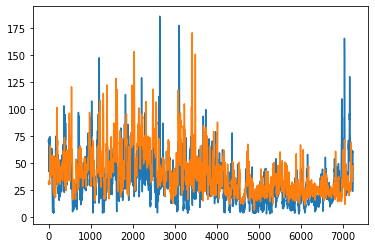

In [ ]:
plt.plot(y_test)
plt.plot(model.predict(X_test))

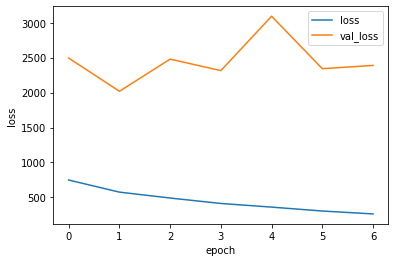

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show() 